# **Tweet Sentiment Analysis and Prediction**


### *Analzing sentiment of tweets through Natural Language Processing using NLTK python library*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re # regular expression is used here for removing special characters
from nltk.stem import WordNetLemmatizer

In [ ]:
data = pd.read_csv('twitter_validation.csv', header=None, encoding="ISO-8859-1") # here encoding parameter is passed make sure the machine reads all the characters including emojis

data.columns = ['id', 'location', 'target', 'tweet']

data.head()

,id,location,target,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
data.tail()

,id,location,target,tweet
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1000 non-null   int64 
 1   location  1000 non-null   object
 2   target    1000 non-null   object
 3   tweet     1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
data.describe()

,id
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


In [ ]:
data.isna().sum()

id          0
location    0
target      0
tweet       0
dtype: int64

In [ ]:
print(len(data))

1000


### A plot showing the basic analysis of tweet sentiment

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64



<AxesSubplot:xlabel='count', ylabel='target'>

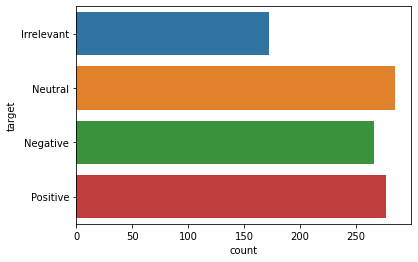

In [ ]:
print(data.target.value_counts())

print()

sns.countplot(y=data.target)

### Basic data cleaning and reorganization

In [ ]:
# dropping the Irrelevant data

data.drop(data.index[data.target == 'Irrelevant'], axis=0, inplace=True)

data

,id,location,target,tweet
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
data.target.value_counts()

Neutral     285
Positive    277
Negative    266
Name: target, dtype: int64

In [ ]:
print(len(data))

828


In [ ]:
# how to reset index

data.reset_index(drop=True, inplace=True)

data

,id,location,target,tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# since the id and location is not important in evaluating the sentiment of the tweet we can drop them.

data.drop(['id', 'location'], axis=1, inplace=True)

data

,target,tweet
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


### Mapping different output labels for every sentiment

In [ ]:
data.target = data.target.map({'Positive' : 1, 'Negative' : -1, 'Neutral' : 0})

data

,target,tweet
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  828 non-null    int64 
 1   tweet   828 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.1+ KB


In [ ]:
tweets = data.tweet

tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: tweet, Length: 828, dtype: object

### Processing the data using NLTK library

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import TweetTokenizer

tk = TweetTokenizer()

tweets = tweets.apply(lambda x:  tk.tokenize(x)).apply(lambda x: " ".join(x))

tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: tweet, Length: 828, dtype: object

In [ ]:
# example of RegEx usage

str1 = "Wonderful @Peacock@#123"

str2 = re.sub('[a-zA-Z0-9]', ' ', str1)

str2

'          @       @#   '

In [ ]:
# remove special characters

tweets = tweets.str.replace('[^a-zA-Z0-9]+', ' ')

tweets

<ipython-input-301-7def0efe759c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets = tweets.str.replace('[^a-zA-Z0-9]+', ' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: tweet, Length: 828, dtype: object

In [ ]:
# extracting words with length greater than 3 just for convenience - not neccessary

from nltk.tokenize import word_tokenize

tweets = tweets.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) >= 3]))

tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: tweet, Length: 828, dtype: object

In [ ]:
# Stemming using snowball stemmer

from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language='english')

tweets = tweets.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda y: ' '.join(y))

tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: tweet, Length: 828, dtype: object

In [ ]:
# removing stop words

from nltk.corpus import stopwords

words = stopwords.words('english')

tweets = tweets.apply(lambda x: [i for i in tk.tokenize(x) if x not in words]).apply(lambda x: ' '.join(x))

tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: tweet, Length: 828, dtype: object

### Vectorization of the processed data using TF-IDF score

In [ ]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

train_data = vec.fit_transform(tweets)

In [ ]:
print(train_data)

  (0, 704)	0.2608257828483461
  (0, 1020)	0.2608257828483461
  (0, 1152)	0.23509805002803952
  (0, 2036)	0.13277165480466424
  (0, 310)	0.22681557001542715
  (0, 875)	0.17354914655342313
  (0, 822)	0.21432663830218204
  (0, 2812)	0.2608257828483461
  (0, 580)	0.2608257828483461
  (0, 1872)	0.24577602391989378
  (0, 645)	0.22681557001542715
  (0, 382)	0.1515362387424402
  (0, 2330)	0.38864111655856126
  (0, 547)	0.49155204783978756
  (1, 812)	0.3913110262186893
  (1, 2943)	0.3913110262186893
  (1, 2609)	0.3687322130878543
  (1, 1430)	0.3913110262186893
  (1, 3715)	0.2191826024944043
  (1, 3763)	0.3527122902262124
  (1, 1386)	0.1452425622664992
  (1, 2513)	0.30168753669061715
  (1, 3717)	0.2529360051104236
  (1, 2195)	0.2369160822487817
  (2, 1452)	0.1689251539717079
  :	:
  (825, 3442)	0.19366877004336633
  (825, 3283)	0.25864309670125385
  (825, 366)	0.16057725849018498
  (825, 2578)	0.1526961927953018
  (825, 726)	0.16855258079932509
  (825, 3383)	0.09099854772577341
  (826, 1405)	0.5

In [ ]:
train_data.shape

(828, 3871)

### Preprocessing of the vector data for training on different ML models

In [ ]:
y = data.target.values

y 

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size=0.30, random_state=42)

### Training the data on different models


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, classification_report, confusion_matrix

In [ ]:
models = [KNeighborsClassifier(n_neighbors=5), MultinomialNB(), SVC(), RandomForestClassifier(), DecisionTreeClassifier()]

for model in models:
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  MAE = mean_absolute_error(y_test, y_pred)
  MAPE = mean_absolute_percentage_error(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  r2s = r2_score(y_test, y_pred)

  print('-' * 100)

  print(f"Model: {model}\n\nMAE: {MAE}\nMAPE: {MAPE}\nMSE: {MSE}\nRMSE: {RMSE}\nr2_score: {r2s}\n")

  print(classification_report(y_test, y_pred))

  print()

----------------------------------------------------------------------------------------------------
Model: KNeighborsClassifier()

MAE: 0.6506024096385542
MAPE: 741556565149359.2
MSE: 0.9879518072289156
RMSE: 0.9939576486092935
r2_score: -0.45199829327265006

              precision    recall  f1-score   support

          -1       0.49      0.68      0.57        79
           0       0.51      0.48      0.49        79
           1       0.59      0.41      0.48        91

    accuracy                           0.52       249
   macro avg       0.53      0.52      0.51       249
weighted avg       0.53      0.52      0.51       249


----------------------------------------------------------------------------------------------------
Model: MultinomialNB()

MAE: 0.5783132530120482
MAPE: 687296328675015.9
MSE: 0.8433734939759037
RMSE: 0.918353686754675
r2_score: -0.23951073815957935

              precision    recall  f1-score   support

          -1       0.52      0.65      0.58      